<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 3 (three) categories. In this exercise, solve the following questions:

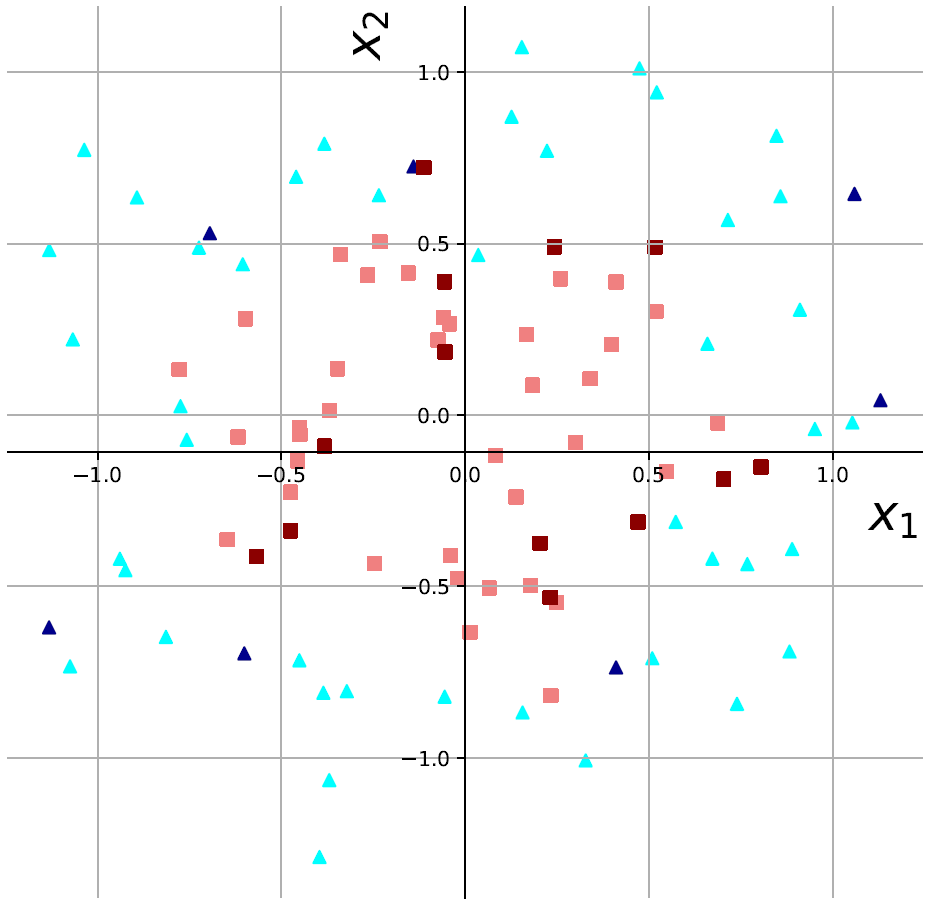

## Part 1

With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red, light green and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue, dark green and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

In [150]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def fit(X, y, n_iter=1000, learning_rate=0.1):
    _, n_features = X.shape
    n_classes = len(np.unique(y))

    weights = np.random.default_rng().random((n_classes, n_features))

    class_counts = np.bincount(y)
    class_weights = 1 / class_counts

    for _ in range(n_iter):
        linear_output = X @ weights.T
        y_pred = np.argmax(linear_output, axis=1)

        misclassified = np.nonzero(y_pred != y)[0]
        if misclassified.size == 0:
            break

        for i in misclassified:
            class_idx = y[i]
            delta = learning_rate * class_weights[class_idx] * np.outer(y[i] == np.arange(n_classes), X[i, :])
            weights += delta

    return weights

def predict(X, weights):
    linear_output = X @ weights.T
    predictions = np.argmax(linear_output, axis=1)

    return predictions

def plot_predict(X, y, weights):
    y_pred = predict(X, weights)

    plt.scatter(X[y == y_pred, 0], X[y == y_pred, 1], c=y[y == y_pred], marker='o', label='Correctly Classified')
    plt.scatter(X[y != y_pred, 0], X[y != y_pred, 1], c=y[y != y_pred], marker='x', label='Misclassified')

    x_min, x_max = np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1
    y_min, y_max = np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Predictions')
    plt.legend(loc='best')
    plt.show()

In [153]:
X_test = np.load('X_test.npy')
X_train = np.load('X_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

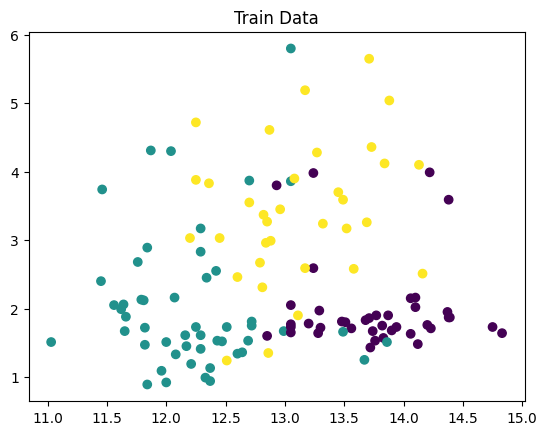

In [154]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train Data')
plt.show()

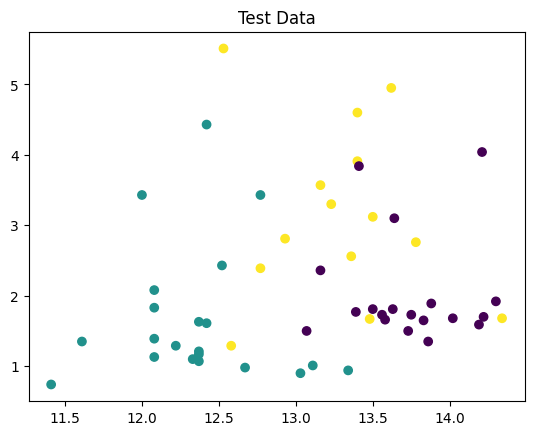

In [155]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test Data')
plt.show()

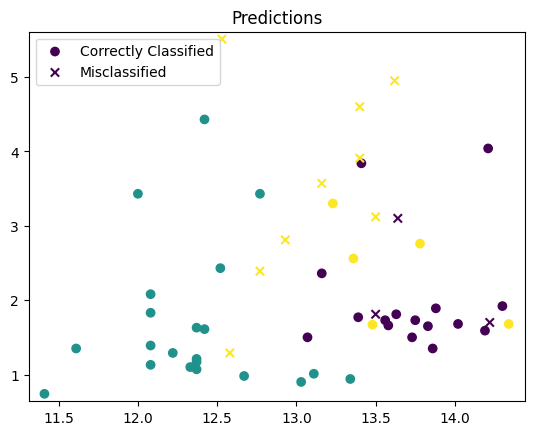

In [156]:
weights = fit(X_train, y_train, n_iter=10000, learning_rate=0.4)

predictions = predict(X_test, weights)

plot_predict(X_test, y_test, weights)

In [157]:
accuracy(predictions, y_test)

0.7777777777777778

In [158]:
assert accuracy(predictions, y_test) > 0.55

## Part 2

**Perform some linear data transformation** that you believe might cause an improvement in the classification's training and testing performances.

In [159]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

# predictions = [1, 1, 1, 1, 1]
# y_test = [1, 1, 2, 1, 1]

In [160]:
def linear_transform(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std

    X_normalized_with_bias = np.concatenate([X_normalized, np.ones((X.shape[0], 1))], axis=1)

    return X_normalized_with_bias

In [161]:
X_train_transformed = linear_transform(X_train)
X_test_transformed = linear_transform(X_test)

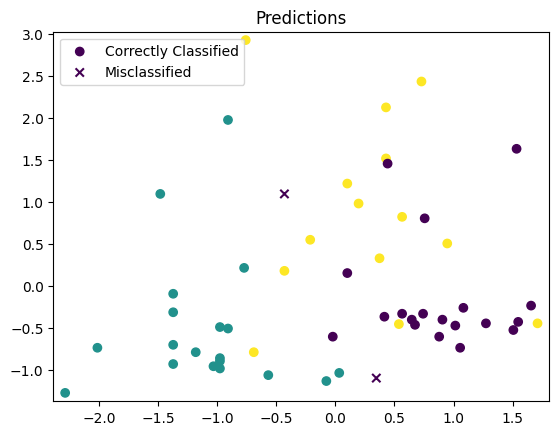

In [162]:
weights = fit(X_train_transformed, y_train, n_iter=10000, learning_rate=0.4)

predictions = predict(X_test_transformed, weights)

plot_predict(X_test_transformed, y_test, weights)


In [163]:
accuracy(predictions, y_test)

0.9629629629629629

In [164]:
assert accuracy(predictions, y_test) > 0.55